In [ ]:
import logging
import sys
import os

# 프로젝트 루트 추가
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)
    print(f"✅ Python path에 추가됨: {project_root}")

# 기존 핸들러 제거
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)

# 기본 로깅 설정
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
    handlers=[
        logging.StreamHandler(sys.stdout),
    ]
)

# 루트 로거 레벨
logger = logging.getLogger()
logger.setLevel(logging.INFO)

# 🔇 시끄러운 외부 라이브러리 로거 조용히
NOISY_LOGGERS = [
    'grpc',
    'grpc._cython.cygrpc',
    'chromadb',
    'chromadb.telemetry',
    'httpx',
    'httpcore',
    'urllib3',
    'asyncio',
    'langsmith.client',
    'test.Analyzer',
    'DataEncoder',
    'test.testAnalyzer',
    'test.Analyzer',
    'DevAnaly'
]

for logger_name in NOISY_LOGGERS:
    logging.getLogger(logger_name).setLevel(logging.WARNING)

print("✅ 로깅 설정 완료 (외부 라이브러리 디버그 메시지 숨김)")

✅ Python path에 추가됨: /Users/dhkim/MyDev/langchain
✅ 로깅 설정 완료 (외부 라이브러리 디버그 메시지 숨김)


In [ ]:
from workflow.rag_agent_workflow import app, AgentState
from workflow.classes import create_initial_state

from common.utils import pretty_print_scenario
from common.test_artifact_maker import make_test_artifacts
from test.test_data_loader import test_data_loader_v1

task_id = "session-20251002-052932-151e52e9" # 10만개 데이터
# task_id = "session-20251002-040520-28a9dc6c" # 정호주임 pc
# task_id = "session-20250930-133411-99e3becc"
# task_id = "session-20251001-151642-1ff9e24a"
job_id = "test+job_id"

print("🔄 아티팩트 생성 중...")
# artifacts = make_test_artifacts(task_id, limit=100)
# artifacts = make_test_artifacts(task_id)
artifacts = test_data_loader_v1(task_id)

print(f"\n✅ 총 {len(artifacts):,}개 아티팩트 로드 완료")

✅ Graph compiled successfully!
🔄 아티팩트 생성 중...
[2025-10-14 20:52:09] DataEncoder - Converted WebKit urls.last_visit_time to datetime
[2025-10-14 20:52:09] DataEncoder - Converted WebKit visits.visit_time to datetime
[2025-10-14 20:52:09] DataEncoder - Converted WebKit downloads.start_time to datetime
[2025-10-14 20:52:09] DataEncoder - Converted WebKit downloads.end_time to datetime
[2025-10-14 20:52:09] DataEncoder - Converted WebKit downloads.last_access_time to datetime
[2025-10-14 20:52:09] DataEncoder - Converted WebKit logins.date_created to datetime
[2025-10-14 20:52:09] DataEncoder - Converted WebKit logins.date_last_used to datetime
[2025-10-14 20:52:09] DataEncoder - Converted WebKit logins.date_received to datetime
[2025-10-14 20:52:09] DataEncoder - Converted WebKit logins.date_password_modified to datetime
[2025-10-14 20:52:09] DataEncoder - Converted WebKit insecure_credentials.create_time to datetime
[2025-10-14 20:52:09] DataEncoder - Converted WebKit cookies.creation_ut

/Users/dhkim/MyDev/langchain/generator/test/DevAnalyzer.py:156: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  temp_df[col] = pd.to_datetime(temp_df[col], errors='coerce')
/Users/dhkim/MyDev/langchain/generator/test/DevAnalyzer.py:156: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  temp_df[col] = pd.to_datetime(temp_df[col], errors='coerce')
/Users/dhkim/MyDev/langchain/generator/test/DevAnalyzer.py:156: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  temp_df[col] = pd.to_datetime(temp_df[col], errors='coerce')
/Users/dhkim/MyDev/langchain/generator/test/DevAnalyzer.py:156: Use

2025-10-14 20:52:09,969 - BackendClient - INFO - 🧪 [TEST] Received 31877 artifacts for validation
2025-10-14 20:52:10,040 - BackendClient - INFO - ✅ [TEST] Successfully validated and stored 31877 artifacts
2025-10-14 20:52:10,041 - BackendClient - INFO - 🔢 [TEST] Total artifacts stored: 31877
2025-10-14 20:52:12,465 - BackendClient - INFO - 🧪 [TEST] Received 29486 artifacts for validation
2025-10-14 20:52:12,531 - BackendClient - INFO - ✅ [TEST] Successfully validated and stored 29486 artifacts
2025-10-14 20:52:12,531 - BackendClient - INFO - 🔢 [TEST] Total artifacts stored: 61363
2025-10-14 20:52:12,675 - BackendClient - INFO - 🧪 [TEST] Received 74 artifacts for validation
2025-10-14 20:52:12,675 - BackendClient - INFO - ✅ [TEST] Successfully validated and stored 74 artifacts
2025-10-14 20:52:12,676 - BackendClient - INFO - 🔢 [TEST] Total artifacts stored: 61437


/Users/dhkim/MyDev/langchain/generator/test/DevAnalyzer.py:156: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  temp_df[col] = pd.to_datetime(temp_df[col], errors='coerce')
/Users/dhkim/MyDev/langchain/generator/test/DevAnalyzer.py:156: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  temp_df[col] = pd.to_datetime(temp_df[col], errors='coerce')
/Users/dhkim/MyDev/langchain/generator/test/DevAnalyzer.py:156: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  temp_df[col] = pd.to_datetime(temp_df[col], errors='coerce')


2025-10-14 20:52:15,770 - BackendClient - INFO - 🧪 [TEST] Received 24809 artifacts for validation
2025-10-14 20:52:15,826 - BackendClient - INFO - ✅ [TEST] Successfully validated and stored 24809 artifacts
2025-10-14 20:52:15,827 - BackendClient - INFO - 🔢 [TEST] Total artifacts stored: 86246
2025-10-14 20:52:15,958 - BackendClient - INFO - 🧪 [TEST] Received 395 artifacts for validation
2025-10-14 20:52:15,960 - BackendClient - INFO - ✅ [TEST] Successfully validated and stored 395 artifacts
2025-10-14 20:52:15,960 - BackendClient - INFO - 🔢 [TEST] Total artifacts stored: 86641
2025-10-14 20:52:16,045 - BackendClient - INFO - 🧪 [TEST] Received 1 artifacts for validation
2025-10-14 20:52:16,046 - BackendClient - INFO - ✅ [TEST] Successfully validated and stored 1 artifacts
2025-10-14 20:52:16,046 - BackendClient - INFO - 🔢 [TEST] Total artifacts stored: 86642

✅ 총 86,642개 아티팩트 로드 완료


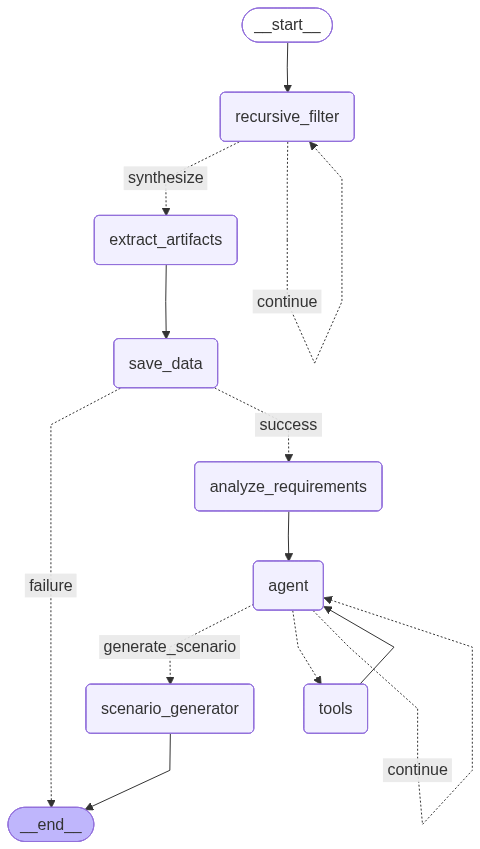

In [ ]:
# from IPython.display import Image, display
# display(Image(app.get_graph(xray=True).draw_mermaid_png()))

In [4]:
print(f"\n🚀 분석 시작...")

initial_state = create_initial_state(
    job_id=job_id,
    task_id=task_id,
    job_info={},
    artifact_chunks=[artifacts],
    intermediate_results=[],
    filter_iteration=0,
    target_artifact_count=100_000,
    current_strictness="very_strict",
    raw_user_requirements=""
)

import time
from typing import cast
start_time = time.time()

initial_state = cast(AgentState, initial_state)
final_state = app.invoke(initial_state)
elapsed_time = time.time() - start_time

print(f"\n⏱️  총 처리 시간: {elapsed_time:.1f}초 ({elapsed_time/60:.1f}분)")
print(f"🔍 필터링된 중요 아티팩트: {sum(len(r.important_artifacts) for r in final_state['intermediate_results'])}개")



🚀 분석 시작...

🔄 필터링 반복 1/3: VERY_STRICT
  - 입력: 원본 아티팩트
  - 현재 아티팩트: 86,642개
  - 필터링 강도: very_strict
  - 목표 비율: 1.5%
  - 목표 개수: 100,000개
  - 총 청크 수: 289개

📦 총 15개 배치로 처리

📦 배치 1/15 (청크 1-20)...
✅ 청크 2: 2개 발견
✅ 청크 4: 8개 발견
✅ 청크 5: 46개 발견
✅ 청크 1: 67개 발견
✅ 청크 7: 39개 발견
✅ 청크 9: 7개 발견
✅ 청크 6: 276개 발견
✅ 청크 3: 291개 발견
✅ 청크 10: 5개 발견
✅ 청크 8: 298개 발견
✅ 청크 11: 130개 발견
✅ 청크 12: 9개 발견
✅ 청크 15: 18개 발견
✅ 청크 13: 99개 발견
✅ 청크 14: 76개 발견
✅ 청크 17: 141개 발견
✅ 청크 20: 29개 발견
✅ 청크 19: 17개 발견
✅ 청크 18: 70개 발견
✅ 청크 16: 200개 발견
  ✅ 배치 1 완료: 1828개 발견
📦 배치 2/15 (청크 21-40)...
✅ 청크 21: 56개 발견
✅ 청크 23: 23개 발견
✅ 청크 22: 149개 발견
✅ 청크 24: 228개 발견
✅ 청크 25: 300개 발견
✅ 청크 27: 13개 발견
✅ 청크 26: 41개 발견
✅ 청크 28: 76개 발견
✅ 청크 30: 30개 발견
✅ 청크 29: 129개 발견
✅ 청크 31: 250개 발견
✅ 청크 34: 79개 발견
✅ 청크 32: 249개 발견
✅ 청크 33: 241개 발견
✅ 청크 35: 151개 발견
✅ 청크 39: 35개 발견
✅ 청크 36: 197개 발견
✅ 청크 37: 30개 발견
✅ 청크 40: 30개 발견
✅ 청크 38: 161개 발견
  ✅ 배치 2 완료: 2468개 발견
📦 배치 3/15 (청크 41-60)...
✅ 청크 43: 29개 발견
✅ 청크 44: 9개 발견
✅ 청크 41: 222개 발견
✅ 청크 45: 300개 발견
✅ 청크 46:

In [5]:
print("\n" + "="*80)
print("--- 📋 최종 분석 결과 ---")
print("="*80)
pretty_print_scenario(final_state["final_report"])


--- 📋 최종 분석 결과 ---
📜 시나리오 분석 보고서: Final Report

[ 보고서 개요 ]
  - 분석 완료

[ 식별 정보 ]
  - Job ID: test+job_id
  - Task ID: session-20251002-052932-151e52e9

[ 재구성된 공격 단계 (Timeline) ]
--------------------------------------------------------------------------------
  (분석된 단계가 없습니다.)

